In [1]:
technique = 'muse'
data_path = f"../data/MUSE"
root_save_path = f"../saved_results/{technique}"
device = "cuda:0"

In [2]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import torch

import sys
sys.path.append('..')
from src.interface import UnitedNet
from src.configs import *

# Dataset Inspection

In [3]:
with np.load(data_path + '/simulation_data_0.1_datacv0_test.npz') as data:
    datakeys = [k for k in data.keys()]
    for k in datakeys:
        print(k, data[k].shape)

labels (200,)
n_views ()
view_0 (200, 500)
view_1 (200, 500)


In [4]:
with np.load(data_path + '/simulation_data_0.1_datacv0_train.npz') as data:
    datakeys = [k for k in data.keys()]
    for k in datakeys:
        print(k, data[k].shape)

labels (800,)
n_views ()
view_0 (800, 500)
view_1 (800, 500)


# Load Data

In [5]:
# constants
decay_coefficients = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
dc_id = {dc:i for dc, i
         in zip(decay_coefficients, range(len(decay_coefficients)))}
cross_validation_fold = 5
cv_index = [i for i in range(cross_validation_fold)]

train_filenames = [[f'simulation_data_{dc}_datacv{i}_train.npz'
                  for i in range(cross_validation_fold)]
                 for dc in decay_coefficients]

test_filenames = [[f'simulation_data_{dc}_datacv{i}_test.npz'
                  for i in range(cross_validation_fold)]
                 for dc in decay_coefficients]

def prepare_traindata(decay_coef, cv_id):
    _traindata = np.load(f"{data_path}/{train_filenames[dc_id[decay_coef]][cv_id]}")
    modalities_num = _traindata['n_views']
    datalist = []
    for i in range(modalities_num):
        adata = ad.AnnData(_traindata[f'view_{i}'])
        adata.obs['label'] = _traindata['labels']
        datalist.append(adata)
    return datalist

def prepare_testdata(decay_coef, cv_id):
    _testdata = np.load(f"{data_path}/{test_filenames[dc_id[decay_coef]][cv_id]}")
    modalities_num = _testdata['n_views']
    datalist = []
    for i in range(modalities_num):
        adata = ad.AnnData(_testdata[f'view_{i}'])
        adata.obs['label'] = _testdata['labels']
        datalist.append(adata)
    return datalist

# Training

In [6]:
for dc in decay_coefficients:
    for i in range(cross_validation_fold):
        adatas_train = prepare_traindata(dc, i)
        adatas_test = prepare_testdata(dc, i)
        save_path = f"{root_save_path}/decay_{dc}_cv_{i}"
        model = UnitedNet(save_path, device=device, technique=muse_config)
        model.train(adatas_train, verbose=False)

/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


training


100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


training


100%|██████████| 20/20 [00:21<00:00,  1.09s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.05s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


training


100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


training


100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


training


100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


training


100%|██████████| 20/20 [00:21<00:00,  1.06s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.00s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:21<00:00,  1.06s/it]


training


100%|██████████| 20/20 [00:21<00:00,  1.07s/it]


training


100%|██████████| 20/20 [00:21<00:00,  1.09s/it]


training


100%|██████████| 20/20 [00:21<00:00,  1.06s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.04s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


training


100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:20<00:00,  1.01s/it]


training


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


training


100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


training


100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


training


100%|██████████| 20/20 [00:19<00:00,  1.02it/s]


# Evaluation

/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.


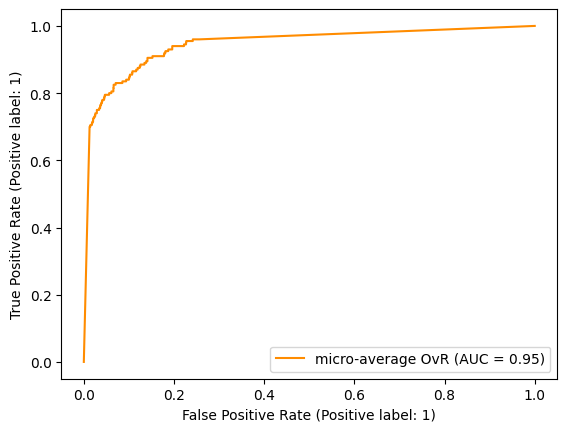

In [9]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

adatas_test = prepare_testdata(0.1, 0)
testmodel = UnitedNet(root_save_path, device=device, technique=muse_config)
testmodel.load_model(f"{root_save_path}/decay_1_cv_0/train_best.pt",device=torch.device(device))
testmodel.model.device_in_use = device
predict_proba = testmodel.predict_prob(adatas_test)
y_real = adatas_test[0].obs['label']
y_bin = label_binarize(y_real, classes=[i for i in range(10)])

RocCurveDisplay.from_predictions(
    y_bin.ravel(),
    predict_proba.ravel(),
    name="micro-average OvR",
    color="darkorange",
    # plot_chance_level=True,
)